In [100]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import svm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [101]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [102]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [103]:
correlation = np.round(heart.corr(), 2)
fig = px.imshow(correlation, text_auto = True)
fig.show()

This heat map shows the percentage chance of a person devloping heart disease based on certain factors like chol, sex, age, gender,etc...


In [104]:
fig = px.scatter_matrix(heart,
    dimensions=["chol", "trestbps", "thalach", "oldpeak"],
    color="target")
fig.show()

This scatter matrix shows how each factor contributes to a case of heart disease based on a x and y factor.


In [105]:
target = heart['target']

In [106]:
input_columns = heart.loc[:, heart.columns != "target"]

In [107]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [109]:
print(x_train.shape)
print(y_train.shape)

(820, 13)
(820,)


In [110]:
print(y_train)
print(y_test)

650    0
863    0
124    0
87     0
166    0
      ..
118    1
4      0
63     1
607    0
338    0
Name: target, Length: 820, dtype: int64
750    1
412    0
457    1
474    0
320    1
      ..
296    0
174    0
714    1
857    1
944    0
Name: target, Length: 205, dtype: int64


In [111]:
k = 7
my_KNN_model = KNN(n_neighbors=k)

In [112]:
my_KNN_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [113]:
y_hat = my_KNN_model.predict(x_test)

In [114]:
y_hat

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0])

In [115]:
np.array(y_test)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0])

In [116]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.28292682926829266


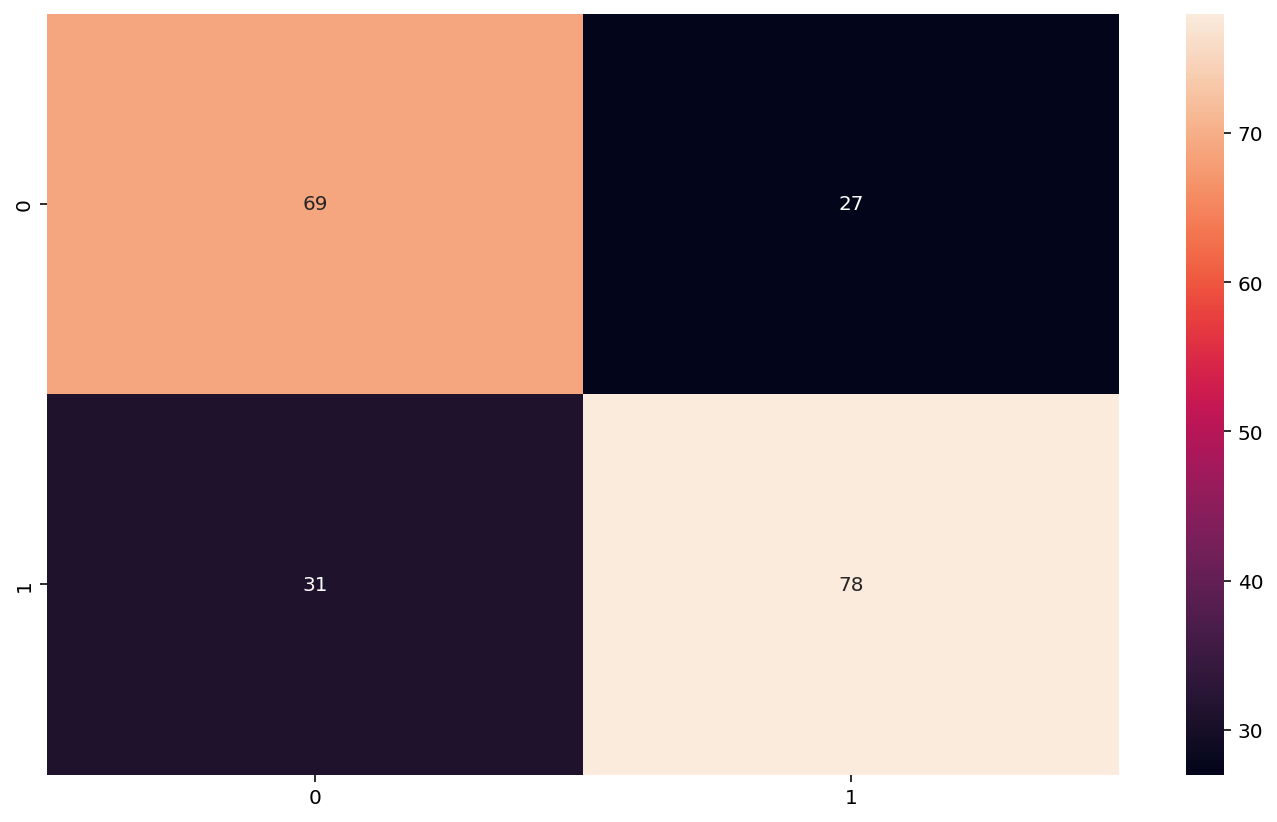

In [117]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

This confusion matrix shows the fp, tn, tp, and fp of cases in heart disease. The goal is to decrease the amount of false negatives becuase it puts the patient at risk of having a increased damage to his health due to lack of treatment due to the heart disease being unknown.


In [118]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0])

In [119]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.28292682926829266


In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test)

0.7170731707317073

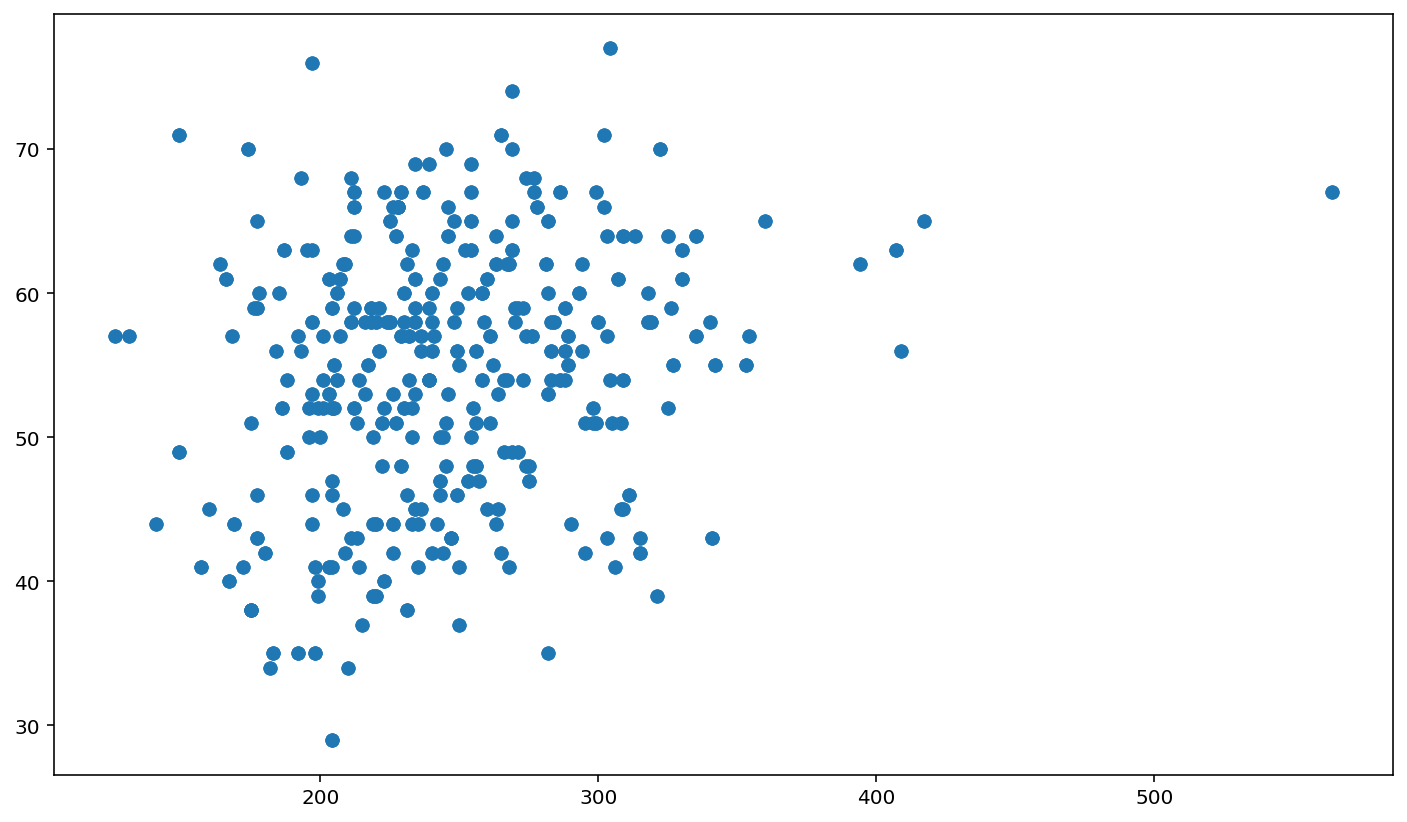

In [121]:
import matplotlib.pyplot as plt
plt.scatter(x = heart['chol'], y = heart['age'])

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [125]:
my_svm_model = SVC(kernel = 'linear', C = 1)
my_svm_model.fit(x_train, y_train)
y_hat = my_svm_model.predict(x_test)
y_hat

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0])

In [126]:
accuracy_score(y_hat, y_test)

0.8292682926829268

In [128]:
from sklearn.neighbors import KNeighborsClassifier as KNN
parameters = {'n_neighbors': [1, 11, 13, 15]}
my_knn_model = KNN()
clf = GridSearchCV(my_knn_model, parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'n_neighbors': 1}


In [131]:
accuracy_score(y_hat, y_test)

0.8292682926829268

In [129]:
from sklearn.metrics import accuracy_score
accuracies = []
for i in range(1,15):
    my_knn_model = KNN(n_neighbors = i)
    my_knn_model.fit(x_train, y_train)
    y_pred = my_knn_model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(accuracy)
    accuracies.append(accuracy)

1.0
0.9414634146341463
0.9073170731707317
0.8341463414634146
0.7365853658536585
0.7219512195121951
0.7170731707317073
0.697560975609756
0.6926829268292682
0.7073170731707317
0.6780487804878049
0.7073170731707317
0.7268292682926829
0.6878048780487804


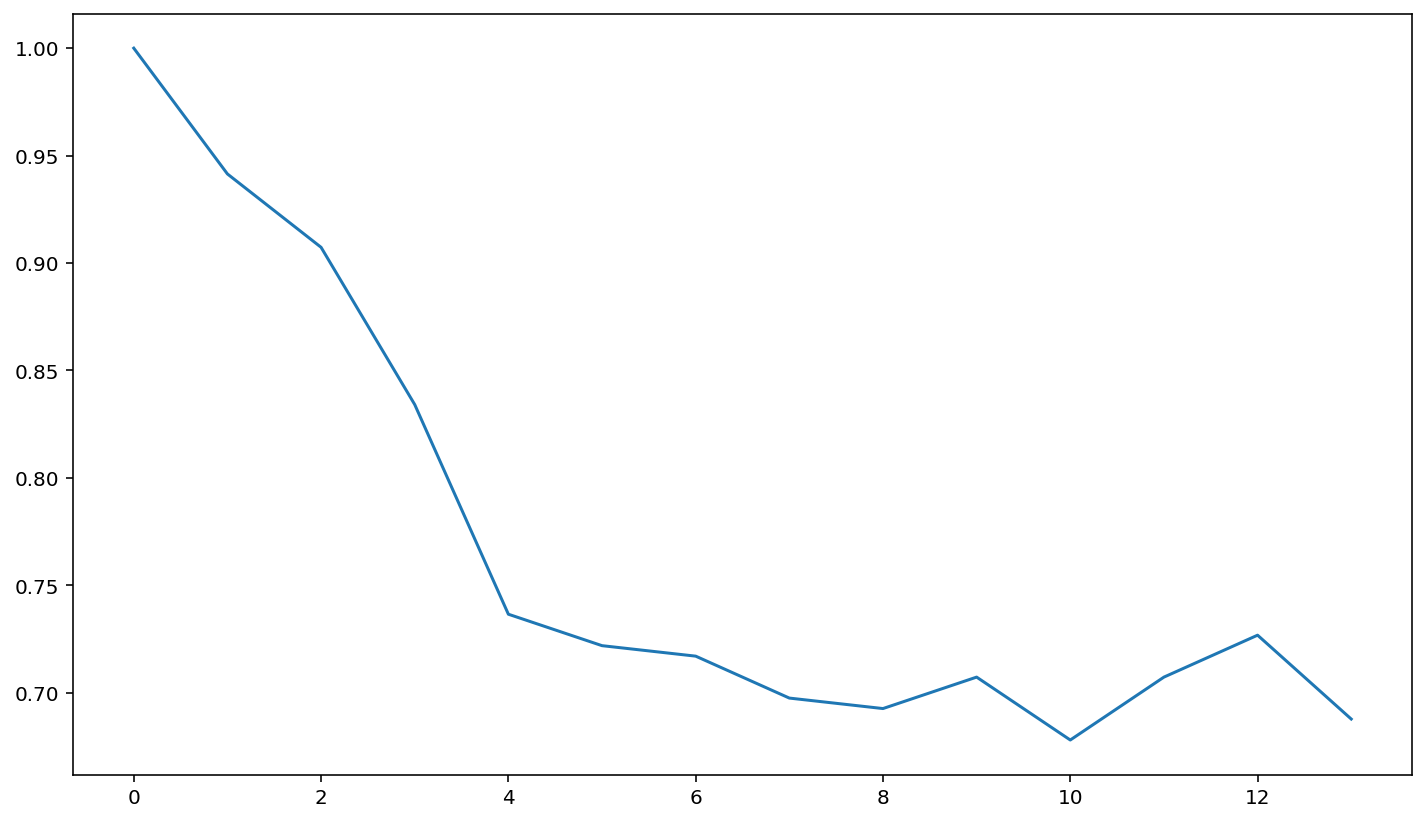

In [130]:
plt.plot(accuracies)